In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import random
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kmeans.csv')
data.head()

,X1,X2
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2


In [3]:
class KmeansClustering():
    def __init__(self):
        self.k=2
        
    def initializeMeans(self, k):
        means = np.empty([k,2], dtype=float)
        range1 = np.array([np.min(data['X1']), np.max(data['X1'])])
        range2 = np.array([np.min(data['X2']), np.max(data['X2'])])
        
        for i in range(self.k):
            x1 = random.uniform(range1[0], range1[1])
            x2 = random.uniform(range2[0], range2[1])
            means[i] = np.array([x1,x2])
        return means
    
    def Classify(self, means):
        list1 = [[],[]]
        dist = np.empty([len(data), self.k], dtype=float)
        for i in range(len(data)):
            for j in range(self.k):
                dist[i][j] = distance.euclidean(means[j], data.iloc[i])
        for i in range(len(data)):
            for j in range(self.k):
                if(min(dist[i]) == distance.euclidean(means[j], data.iloc[i])):
                    list1[j].append(data.iloc[i])
        return np.array(list1)
    
    def reInitializeMeans(self, clusters, means):
        for j in range(self.k):
            min_means = []
            for l in range(2):
                add = 0
                for i in range(len(clusters[j])):
                    add = add+clusters[j][i][l]
                mean = add/len(clusters[j])
                min_means.append(mean)
            means[j] = np.array(min_means)
        return means
    
    def train(self):
        temp = np.empty([self.k,2], dtype=float)
        means = self.initializeMeans(self.k)
        iteration = 0
        while(1):
            clusters=self.Classify(means)
            if(iteration>=1000):
                break
            for i in range(self.k):
                for j in range(2):
                    temp[i][j] = means[i][j]
            means=self.reInitializeMeans(clusters, means)
            iteration=iteration+1
        print(clusters)
        return clusters
        
    def plot(self, clusters):
        for i in range(self.k):
            for j in range(len(clusters[i])):
                if(i==0):
                    plt.scatter(clusters[i][j][0], clusters[i][j][1], c='red')
                else:
                    plt.scatter(clusters[i][j][0], clusters[i][j][1], c='green')

In [4]:
model = KmeansClustering()

In [5]:
clusters = model.train()

[list([X1    5.9
X2    3.2
Name: 0, dtype: float64, X1    6.2
X2    2.8
Name: 2, dtype: float64, X1    6.7
X2    3.1
Name: 7, dtype: float64, X1    6.0
X2    3.0
Name: 9, dtype: float64])
 list([X1    4.6
X2    2.9
Name: 1, dtype: float64, X1    4.7
X2    3.2
Name: 3, dtype: float64, X1    5.5
X2    4.2
Name: 4, dtype: float64, X1    5.0
X2    3.0
Name: 5, dtype: float64, X1    4.9
X2    3.1
Name: 6, dtype: float64, X1    5.1
X2    3.8
Name: 8, dtype: float64])]


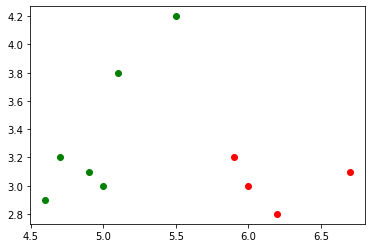

In [6]:
model.plot(clusters)